In [45]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
plt.style.use('paper')

In [59]:
csvpath = '../csvs/random/random_features/'
df = pd.read_csv(csvpath+'random1e7featuressplit.csv', index_col=0)
df.head()

,ID,Mean,Sigma,KSpval,tlyap,megno,Nlyap,instability_time,megnonan,tlyap10,megno10,Nlyap10,tlyap5,megno5,Nlyap5,tlyap3,megno3,Nlyap3
0,1007.0,5.587629,0.464593,6.663128e-02,40139.135651,76.149933,4.335908,1.740396e+05,0.0,167.062457,98.031355,1041.763579,665.979295,80.197481,261.328819,10831.818995,66.059705,16.067438
1,1021.0,6.003999,0.327314,5.287958e-01,1017.008304,181.580826,2644.674138,2.689656e+06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1025.0,5.794418,0.385985,4.101035e-02,1181.328178,181.056332,570.925282,6.744501e+05,0.0,1243.771432,54.339329,542.262112,1228.099527,126.191854,549.181975,NaN,NaN,NaN
3,1041.0,5.730234,0.494415,8.813668e-07,1248.293429,124.395902,565.682402,7.144123e+05,0.0,9095.502208,9.486404,78.545670,NaN,NaN,NaN,NaN,NaN,NaN
4,10518.0,6.465849,0.431597,6.504852e-03,15455.587023,187.663491,599.867233,9.271300e+06,0.0,16753.088367,53.432842,553.408423,14203.638663,120.440190,652.741205,15294.062911,184.076605,606.202568


In [60]:
df.shape

(244, 18)

There are two systems with KSpval = Nan, but both look much more lognormal than our cutoff by eye, so this won't flag them as bad

In [73]:
df[df['KSpval'].isnull()]

,ID,Mean,Sigma,KSpval,tlyap,megno,Nlyap,instability_time,megnonan,tlyap10,megno10,Nlyap10,tlyap5,megno5,Nlyap5,tlyap3,megno3,Nlyap3
60,1504.0,4.118159,0.386328,NaN,52.621524,173.807660,230.554893,12132.149881,0.0,87.482596,12.801115,138.680725,129.720083,22.272145,93.52561,80.659596,55.594309,150.411735
214,2313.0,4.021209,0.437614,NaN,28.482759,182.654635,465.902079,13270.176544,0.0,36.552274,37.011622,363.046535,36.493522,80.595176,363.63102,29.030316,154.622762,457.114441


In [76]:
bad = (df['KSpval'] <1.e-20)
bad.sum()

16

In [77]:
df[df['tlyap10'].isnull()]['instability_time']

1      2.689656e+06
9      1.568405e+06
20     3.276998e+05
35     1.994020e+05
39     6.060969e+05
41     2.629675e+05
55     4.862424e+05
63     7.090474e+06
64     4.552959e+05
66     2.466274e+05
82     4.199334e+05
84     1.748224e+05
89     7.712788e+04
98     2.406891e+06
99     4.674289e+06
105    6.818459e+05
111    2.049791e+06
112    1.066045e+06
122    3.084122e+05
123    1.885180e+06
125    3.132578e+05
133    9.489921e+06
136    1.076960e+06
138    2.050046e+05
141    5.331476e+06
155    6.859104e+06
156    3.858564e+05
169    1.626356e+06
170    3.353865e+05
177    5.580619e+04
180    3.318287e+05
181    1.939449e+06
191    2.025613e+06
200    6.798193e+05
206    4.258664e+05
223    1.238896e+06
225    3.688632e+06
255    7.944888e+06
259    9.871765e+04
261    1.820389e+06
Name: instability_time, dtype: float64

In [78]:
print("Fraction of bad systems:{0:.3f}".format(bad.sum()/df.shape[0]))

Fraction of bad systems:0.066


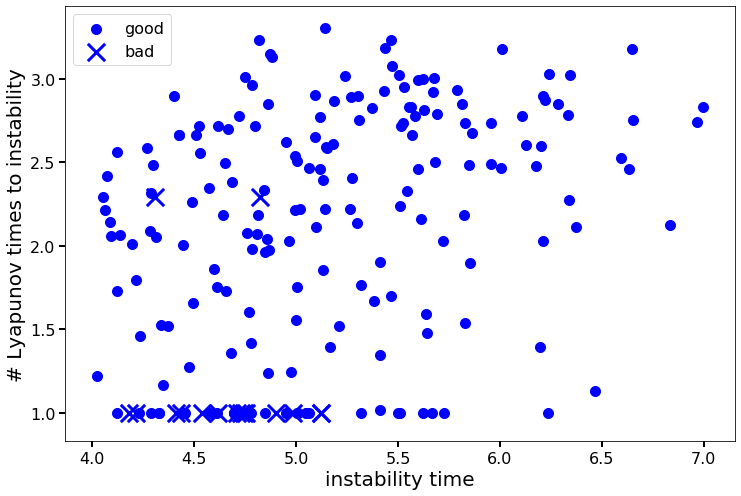

In [85]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(np.log10(df['instability_time'])[~bad], np.log10(df['Nlyap10'])[~bad], c='b', marker='o', label='good')
ax.scatter(np.log10(df['instability_time'])[bad], np.log10(df['Nlyap10'])[bad], c='b', marker='x', s=300, label='bad')
ax.set_xlabel('instability time')
ax.set_ylabel('# Lyapunov times to instability')
ax.legend()

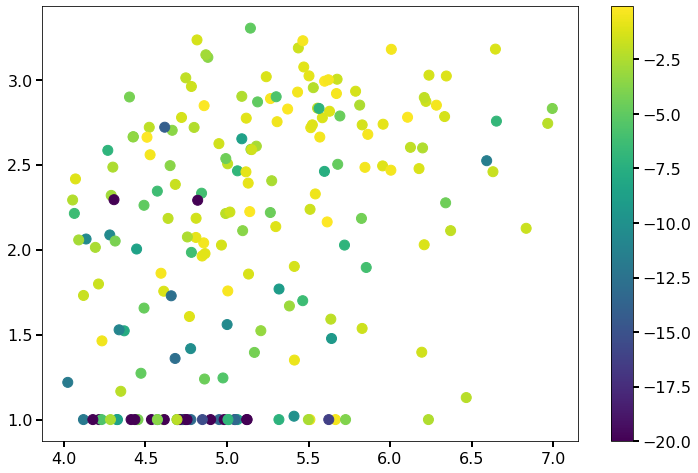

In [65]:
fig, ax = plt.subplots(figsize=(12,8))
cm = plt.cm.get_cmap('RdYlBu')
cb = ax.scatter(np.log10(df['instability_time']), np.log10(df['Nlyap10']), c=np.log10(df['KSpval']), vmin=-20)
plt.colorbar(cb)

In [68]:
df[(df['KSpval'] < 1.e-20) & (df['Nlyap10'] > 100)]

,ID,Mean,Sigma,KSpval,tlyap,megno,Nlyap,instability_time,megnonan,tlyap10,megno10,Nlyap10,tlyap5,megno5,Nlyap5,tlyap3,megno3,Nlyap3
100,1819.0,4.329505,0.104577,3.559540e-43,536.417279,67.604695,37.779835,20265.756551,0.0,102.958764,21.641818,196.833720,76.987784,46.788046,263.233407,102.686290,56.669543,197.356011
211,2300.0,4.577946,0.129484,1.170932e-22,459.474787,132.999387,143.808591,66076.421954,0.0,338.297556,18.969901,195.320424,618.663271,23.067991,106.805148,575.041896,47.247927,114.907144


In [56]:
csvpath = '../csvs/resonant/resonant_features/'
df = pd.read_csv(csvpath+'res1e7featuressplit.csv', index_col=0)
df.head()

,ID,Mean,Sigma,KSpval,instability_time,tlyap10,megno10,Nlyap10
3,3.0,6.837504,0.306543,0.403103,2.287671e+06,16155.249034,13.950857,141.605409
4,4.0,5.687568,0.239838,0.001330,9.668931e+05,96689.311474,2.104692,10.000000
5,5.0,5.797549,0.456784,0.930714,5.755894e+05,691.667984,80.773003,832.175823
8,8.0,5.891151,0.417529,0.709091,2.930966e+05,2362.272279,12.443361,124.074012
13,13.0,4.644210,0.256174,0.000218,4.506090e+04,4506.103381,2.022401,9.999969


In [57]:
good = df['KSpval'] > 1.e-6
print("Fraction of bad systems:{0:.3f}".format((df.shape[0]-good.sum())/df.shape[0]))

Fraction of bad systems:0.069


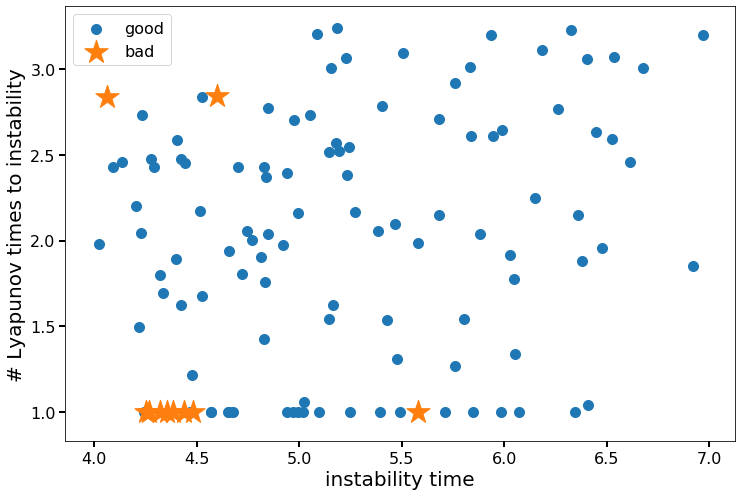

In [42]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(np.log10(df['instability_time'])[good], np.log10(df['Nlyap10'])[good], marker='o', label='good')
ax.scatter(np.log10(df['instability_time'])[~good], np.log10(df['Nlyap10'])[~good], marker='*', s=600, label='bad')
ax.set_xlabel('instability time')
ax.set_ylabel('# Lyapunov times to instability')
ax.legend()

In [44]:
df.shape

(145, 8)

In [43]:
good.sum()

135

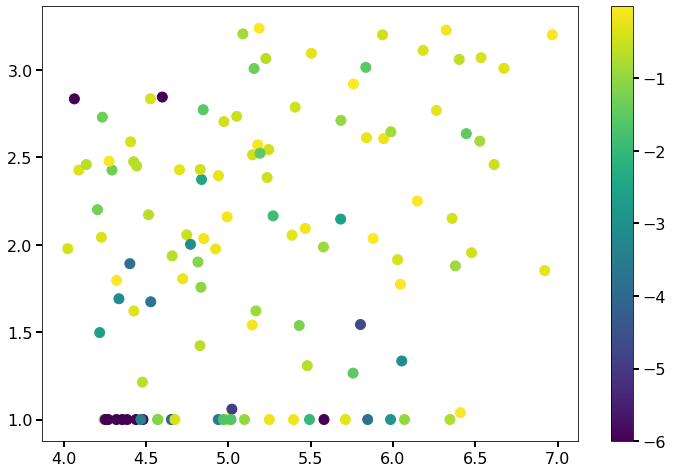

In [41]:
fig, ax = plt.subplots(figsize=(12,8))
cm = plt.cm.get_cmap('RdYlBu')
cb = ax.scatter(np.log10(df['instability_time']), np.log10(df['Nlyap10']), c=np.log10(df['KSpval']), vmin=-6)
plt.colorbar(cb)